In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import stylia as st
from stylia import NamedColors, ContinuousColorMap, ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH

DATAPATH = "../data"
RESULTSPATH = "../results"

colors = NamedColors()
red = colors.get("red")
blue = colors.get("blue")
purple = colors.get("purple")
yellow = colors.get("yellow")
green = colors.get("green")
gray = colors.get("gray")

## Figure 2C
Number of significant genes per drug in our dataset of 32 drugs

In [28]:
drugs = pd.read_csv(os.path.join("data", "curated_drugs_for_gradient.tsv"), sep="\t")
genes = pd.read_csv(os.path.join(RESULTSPATH, "results_pairs","chemical_gene_pairs_prediction_output_focus_with_variant_aggregates_zscore95_filter.csv" ))
zscore_lim = 1.96
genes_z95 = genes[genes["consensus_zscore"]>=zscore_lim]
genes_z95.shape

(195, 36)

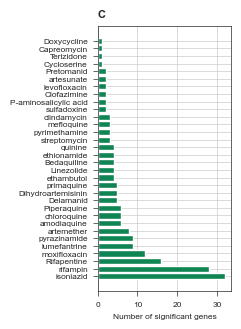

In [29]:
genes_z95_counts = genes_z95["chemical"].value_counts().reset_index()
fig, axs = st.create_figure(1,1, width=ONE_COLUMN_WIDTH/2, height=ONE_COLUMN_WIDTH)
ax = axs.next()
ax.barh(genes_z95_counts["chemical"], genes_z95_counts["count"], color=green)
st.label(ax, ylabel="", xlabel="Number of significant genes", title="", abc= "C")